# 📄 Product Matching Assignment Summary

##  Objective
The goal of this assignment was to identify and match equivalent products across two datasets (`df1` and `df2`) that may have slightly different titles, brands, or formatting. After matching, we aimed to analyze the **similarity of product names** and their **price differences**, helping identify potential mismatches or inconsistencies.

---

## Methodology

### 1. **Preprocessing**
- Selected key columns (`Nome`, `Marchio`, `Title`, and `price`) from both datasets.
- Created a `match_key` column in both `df1` and `df2` combining product names and brands (if needed) for better fuzzy matching.

### 2. **Fuzzy Matching using RapidFuzz**
- Used `RapidFuzz` library's `process.extractOne` and `fuzz.token_sort_ratio` to match each `df1` product against the best title in `df2`.
- Applied a similarity threshold (`>= 70`) to filter only relevant matches and avoid noise.

### 3. **Results Storage**
For every confident match, the following were saved:
- Product name and price from `df1` and `df2`
- Match similarity score
- Maximum price between the two
- Final output stored in `matched_df` DataFrame

### 4. **Filtering High-Confidence Matches**
- Extracted a subset of high-confidence matches using a threshold > 85%
- Stored this in `high_confidence` DataFrame

### 5. **Price Difference Analysis**
- Calculated the absolute difference in price between matched items
- Sorted the results to show large differences between seemingly similar products

### 6. **Visualization**
- Plotted top matched product pairs by similarity using horizontal bar charts
- This helps visually inspect which product names matched best

---

## 📊 Summary of Results

- **Total Matches Found with threshold 70%**: `56`
- **High Confidence Matches (>85%)**: `1`
- **Average Similarity Score**: `72.98969953904175`
- **Average Price Difference**: `1258.3333333333333`


---

##  Reasoning Behind Method Choices

- **Fuzzy Matching** was necessary due to non-identical product names (e.g., different orders, extra descriptors like "Nero").
- **Token Sort Ratio** was selected because it handles out-of-order word matches better.
- **Threshold of 70%%** helped balance between catching genuine matches and avoiding false positives.
- **Visualization** made it easier to communicate and validate the matching quality.
- **Price analysis** exposed inconsistencies between datasets, which is useful in business decision-making.

---

## **Conclusion**

The fuzzy matching approach provided a practical and efficient solution to the product-matching problem. By combining string similarity and price analysis, we were able to:
- Identify and validate product matches
- Highlight potential mismatches or data quality issues
- Support better data integration between catalogs

This approach can be extended with more advanced NLP techniques or used in other domains like deduplication, catalog cleaning, and inventory syncing.



In [19]:
import pandas as pd

df1 = pd.read_csv('dataset1.csv')  # dataset with columns like 'Nome', 'Marchio'
df2 = pd.read_csv('dataset2.csv')  # dataset with 'Title', 'price'

In [20]:
print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)

df1.info()
df2.info()

Dataset 1 shape: (382, 9)
Dataset 2 shape: (11229, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nome             382 non-null    object 
 1   Marchio          382 non-null    object 
 2   Categoria        382 non-null    object 
 3   Compatibilità    286 non-null    object 
 4   Tipologia        286 non-null    object 
 5   Caratteristiche  372 non-null    object 
 6   Inizio prod.     237 non-null    float64
 7   Fine prod.       72 non-null     object 
 8   price            382 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 27.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11229 entries, 0 to 11228
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          11229 non-null  object
 1   IntName        11228 non-null  

In [21]:
df1.head()

,Nome,Marchio,Categoria,Compatibilità,Tipologia,Caratteristiche,Inizio prod.,Fine prod.,price
0,Canon EF 75-300mm f/4-5.6,Canon & compatible,Obiettivi,Reflex,Zoom,Teleobiettivi,1999.0,2018,1298
1,Sigma 35mm f/1.4 DG HSM Art,Canon & compatible,Obiettivi,Reflex,Fissi,Grandangolari,2000.0,NaN,1399
2,Nikon AF-S 600mm f/4 D ED II,Nikon & compatible,Obiettivi,Reflex,Fissi,Teleobiettivi,NaN,NaN,4805
3,Nikon AF 14mm f/2.8 D ED,Nikon & compatible,Obiettivi,Reflex,Fissi,Grandangolari,2000.0,2020,4371
4,Nikon AF-S 200-400mm f/4 G ED VR,Nikon & compatible,Obiettivi,Reflex,Zoom,Teleobiettivi,2003.0,2010,3771


In [22]:
df2.head()

,Title,IntName,ReleaseDate,features,Category_Name,price
0,Sony High Grade 0.7X Wide Angle Lens Argento,High Grade 0.7X Wide Angle Lens,NaN,"{Capacità della batteria=null, Prodotti compat...",Camera Lenses,4766
1,Canon PowerShot S70 7.1 Mpixel + 32 MBCF 1/1.8...,PowerShot S70 7.1 Mpixel + 32 MBCF,NaN,"{Capacità della batteria=null, Prodotti compat...",Digital Cameras,3418
2,HP Photosmart R707 digitale camera met cameradock,Photosmart R707 digitale camera met HP cameradock,NaN,"{Capacità della batteria=null, Prodotti compat...",Digital Cameras,4614
3,Canon Zoom lens EF 28-90MM 4-5.6 DC III Nero,Zoom lens EF 28-90MM 4-5.6 DC III,NaN,"{Capacità della batteria=null, Prodotti compat...",Camera Lenses,1930
4,Canon Lens EF180MM 1:3.5 L MACRO USM Nero,Lens EF180MM 1:3.5 L MACRO USM,NaN,"{Capacità della batteria=null, Prodotti compat...",Camera Lenses,3371


In [23]:
print("\nMissing values in df1:")
print(df1.isnull().sum())

print("\nMissing values in df2:")
print(df2.isnull().sum())


Missing values in df1:
Nome                 0
Marchio              0
Categoria            0
Compatibilità       96
Tipologia           96
Caratteristiche     10
Inizio prod.       145
Fine prod.         310
price                0
dtype: int64

Missing values in df2:
Title                0
IntName              1
ReleaseDate      11215
features             0
Category_Name        0
price                0
dtype: int64


In [24]:
print("\nColumn names in df1:", df1.columns.tolist())
print("Unique brands in df1['Marchio']:", df1['Marchio'].unique())

print("\nColumn names in df2:", df2.columns.tolist())


Column names in df1: ['Nome', 'Marchio', 'Categoria', 'Compatibilità', 'Tipologia', 'Caratteristiche', 'Inizio prod.', 'Fine prod.', 'price']
Unique brands in df1['Marchio']: ['Canon & compatible' 'Nikon & compatible' 'Sony' 'Fujifilm' 'Leica']

Column names in df2: ['Title', 'IntName', 'ReleaseDate', 'features', 'Category_Name', 'price']


In [25]:
print("df1 price stats:\n", df1['price'].describe())
print("\ndf2 price stats:\n", df2['price'].describe())

df1 price stats:
 count     382.000000
mean     2393.905759
std      1420.330334
min       106.000000
25%      1159.500000
50%      2380.000000
75%      3618.000000
max      4992.000000
Name: price, dtype: float64

df2 price stats:
 count    11229.000000
mean      2558.873542
std       1415.137628
min        100.000000
25%       1335.000000
50%       2550.000000
75%       3789.000000
max       5000.000000
Name: price, dtype: float64


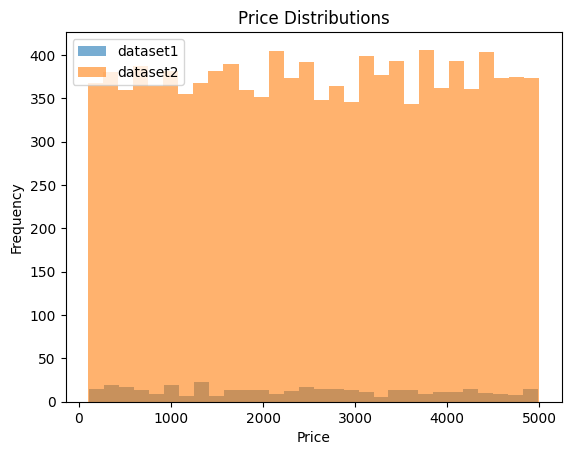

In [26]:
import matplotlib.pyplot as plt

plt.hist(df1['price'], bins=30, alpha=0.6, label='dataset1')
plt.hist(df2['price'], bins=30, alpha=0.6, label='dataset2')
plt.legend()
plt.title("Price Distributions")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


1. dataset2 has many more entries
The orange bars (dataset2) are much taller across all price ranges, meaning this dataset has more products in total than dataset1.

2. dataset1 is sparsely distributed
The blue bars (dataset1) are much shorter and scattered. This shows that fewer items are present in this dataset, and they might not be evenly spread across price ranges.

3. Both datasets cover a wide price range (0–5000)
We can see activity across the full price spectrum, though dataset2 has more consistent coverage.



## **Preprocessing & Creating Matching Keys.**

This step prepares both datasets for fuzzy matching by:

- Cleaning product names

- Standardizing formatting (lowercase, remove special characters, etc.)

- Creating a new column called match_key in both DataFrames

**This standardization makes fuzzy string matching much more reliable.**

In [27]:
import re

# Function to clean text (remove special characters, lowercase, etc.)
def clean_text(text):
    text = str(text).lower()                        # lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)         # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()        # remove extra whitespace
    return text

# Dataset 1: Combine 'Marchio' + 'Nome' for better matching, then clean
df1['match_key'] = (df1['Marchio'].astype(str) + " " + df1['Nome'].astype(str)).apply(clean_text)

# Dataset 2: Clean 'Title' column directly
df2['match_key'] = df2['Title'].astype(str).apply(clean_text)

# Preview a few examples
print("Sample match_key values from df1:\n", df1['match_key'].head(5))
print("\nSample match_key values from df2:\n", df2['match_key'].head(5))

Sample match_key values from df1:
 0            canon compatible canon ef 75300mm f456
1        canon compatible sigma 35mm f14 dg hsm art
2       nikon compatible nikon afs 600mm f4 d ed ii
3           nikon compatible nikon af 14mm f28 d ed
4    nikon compatible nikon afs 200400mm f4 g ed vr
Name: match_key, dtype: object

Sample match_key values from df2:
 0          sony high grade 07x wide angle lens argento
1    canon powershot s70 71 mpixel 32 mbcf 118 71 m...
2    hp photosmart r707 digitale camera met cameradock
3            canon zoom lens ef 2890mm 456 dc iii nero
4              canon lens ef180mm 135 l macro usm nero
Name: match_key, dtype: object


In [28]:
df1[['Nome', 'Marchio', 'match_key']].head()
df2[['Title', 'match_key']].head()

,Title,match_key
0,Sony High Grade 0.7X Wide Angle Lens Argento,sony high grade 07x wide angle lens argento
1,Canon PowerShot S70 7.1 Mpixel + 32 MBCF 1/1.8...,canon powershot s70 71 mpixel 32 mbcf 118 71 m...
2,HP Photosmart R707 digitale camera met cameradock,hp photosmart r707 digitale camera met cameradock
3,Canon Zoom lens EF 28-90MM 4-5.6 DC III Nero,canon zoom lens ef 2890mm 456 dc iii nero
4,Canon Lens EF180MM 1:3.5 L MACRO USM Nero,canon lens ef180mm 135 l macro usm nero


## **Fuzzy Matching Logic**

We’ll now compare each product in df1 (small catalog) against all entries in df2 (large retail list) using fuzzy matching. Then:

- Return the best match from df2 for each row in df1

- Only keep matches with a similarity score ≥ 80 (you can adjust later)

- Include the price from both datasets and take the max price

In [30]:
%pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.8 MB/s eta 0:00:00


In [36]:
from rapidfuzz import process, fuzz

matches = []

for index, row in df1.iterrows():
    query = row['match_key']

    # Get best match from df2 match_key column
    best_match = process.extractOne(
        query,
        df2['match_key'],
        scorer=fuzz.token_sort_ratio
    )

    if best_match and best_match[1] >= 70:  # threshold
        match_row = df2[df2['match_key'] == best_match[0]].iloc[0]

        matches.append({
            'df1_index': index,
            'df1_name': row['Nome'],
            'df1_brand': row['Marchio'],
            'df1_price': row['price'],
            'df2_title': match_row['Title'],
            'df2_price': match_row['price'],
            'similarity': best_match[1],
            'max_price': max(row['price'], match_row['price'])
        })

matched_df = pd.DataFrame(matches)

In [37]:
matched_df.head()

,df1_index,df1_name,df1_brand,df1_price,df2_title,df2_price,similarity,max_price
0,8,Canon EF 70-300mm f/4-5.6 IS USM II,Canon & compatible,2388,Canon EF 70-300mm f/4.5-5.6 DO IS USM,4311,75.000000,4311
1,13,Canon EF 70-200mm f/2.8 L USM,Canon & compatible,489,Canon EF 70-200mm f/2.8L USM,818,73.529412,818
2,15,Canon EF 180mm f/3.5 L Macro USM,Canon & compatible,4482,Canon EF 180mm f/3.5L Macro USM Nero,4847,71.604938,4847
3,16,Canon EF-S 15-85mm f/3.5-5.6 IS USM,Canon & compatible,385,Canon EF-S 15-85mm f/3.5-5.6 IS USM Nero,4548,72.500000,4548
4,18,Canon EF 75-300mm f/4-5.6 IS USM,Canon & compatible,4512,Canon EF 70-300mm f/4.5-5.6 DO IS USM,4311,75.324675,4512


In [41]:
# View the first 10 matches
matched_df.head(10)

,df1_index,df1_name,df1_brand,df1_price,df2_title,df2_price,similarity,max_price
0,8,Canon EF 70-300mm f/4-5.6 IS USM II,Canon & compatible,2388,Canon EF 70-300mm f/4.5-5.6 DO IS USM,4311,75.000000,4311
1,13,Canon EF 70-200mm f/2.8 L USM,Canon & compatible,489,Canon EF 70-200mm f/2.8L USM,818,73.529412,818
2,15,Canon EF 180mm f/3.5 L Macro USM,Canon & compatible,4482,Canon EF 180mm f/3.5L Macro USM Nero,4847,71.604938,4847
3,16,Canon EF-S 15-85mm f/3.5-5.6 IS USM,Canon & compatible,385,Canon EF-S 15-85mm f/3.5-5.6 IS USM Nero,4548,72.500000,4548
4,18,Canon EF 75-300mm f/4-5.6 IS USM,Canon & compatible,4512,Canon EF 70-300mm f/4.5-5.6 DO IS USM,4311,75.324675,4512
5,25,Canon EF 300mm f/2.8 L USM,Canon & compatible,821,Canon EF 300mm f/2.8L IS USM Bianco,431,72.972973,821
6,32,Canon EF 70-300mm f/4-5.6 L IS USM,Canon & compatible,2275,Canon EF 70-300mm f/4.5-5.6 DO IS USM,4311,75.949367,4311
7,33,Canon EF 70-200mm f/2.8 L IS USM,Canon & compatible,2514,Canon EF 70-200mm f/2.8L IS USM,3464,72.972973,3464
8,35,Canon EF 70-200mm f/4 L IS II USM,Canon & compatible,3633,Canon EF 70-200mm f/4L IS USM Bianco,191,73.170732,3633
9,42,Canon EF 35mm f/2 IS USM,Canon & compatible,1254,Canon EF 300mm f/2.8L IS USM Bianco,431,71.232877,1254


In [39]:
matched_df.tail(10)

,df1_index,df1_name,df1_brand,df1_price,df2_title,df2_price,similarity,max_price
46,260,Canon EF 70-200mm f/4 L IS USM,Canon & compatible,2481,Canon EF 70-200mm f/4L IS USM Bianco,191,75.949367,2481
47,286,Sony FE 135mm F/1.8 GM,Sony,762,Sony FE 35mm F1.8 MILC/SRL Nero,1282,74.074074,1282
48,290,Canon RF 24-105mm f/4 L IS USM,Canon & compatible,3011,Canon EF 24-105mm f/4L IS USM Nero,2303,70.129870,3011
49,298,Sony FE 35mm f/1.8,Sony,264,Sony FE 35mm F1.8 MILC/SRL Nero,1282,76.000000,1282
50,316,Canon RF 15-35mm f/2.8 L IS USM,Canon & compatible,923,Canon RF 15-35mm F2.8L IS USM,1192,72.222222,1192
51,326,Canon RF 24-70mm f/2.8 L IS USM,Canon & compatible,1147,Canon RF 24-70mm F2.8L IS USM,565,72.222222,1147
52,331,Canon RF 70-200mm f/2.8 L IS USM,Canon & compatible,3469,Canon EF 70-200mm f/2.8L IS USM,3464,70.270270,3469
53,351,Canon RF 70-200mm f/4 L IS USM,Canon & compatible,243,Canon EF 70-200mm f/4L IS USM Bianco,191,73.417722,243
54,372,Sony FE 70-200mm f/2.8 GM OSS II,Sony,3055,Sony FE 70-200mm F2.8 GM OSS MILC Teleobiettiv...,389,71.428571,3055
55,374,Canon RF 100-400mm f/5.6-8 IS USM,Canon & compatible,4067,Canon EF 100-400mm f/4.5-5.6L IS USM,2332,70.129870,4067


In [40]:
matched_df.shape

(56, 8)

**Visualize Similarity Score Distribution**

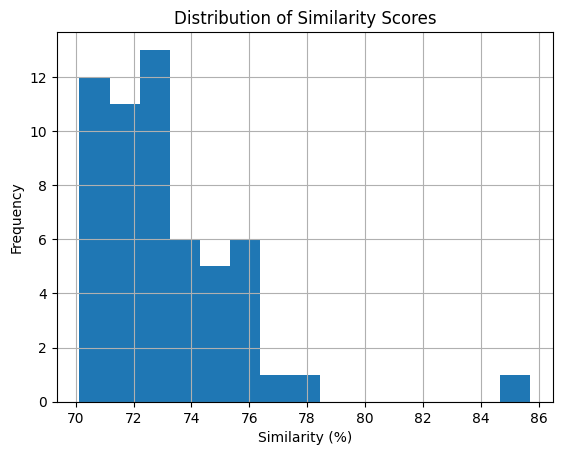

In [42]:
import matplotlib.pyplot as plt

matched_df['similarity'].hist(bins=15)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity (%)')
plt.ylabel('Frequency')
plt.show()

Most scores are clustered around 70–75%, with very few above 85%.

**Sort by similarity:**

In [43]:
matched_df.sort_values('similarity').head(10)

,df1_index,df1_name,df1_brand,df1_price,df2_title,df2_price,similarity,max_price
21,114,Canon EF 24-105mm f/4 L IS USM,Canon & compatible,4250,Canon EF 24-105mm f/4L IS USM Nero,2303,70.12987,4250
16,94,Canon EF 200mm f/2.8 L II USM,Canon & compatible,2759,Canon EF 300mm f/2.8L IS USM Bianco,431,70.12987,2759
48,290,Canon RF 24-105mm f/4 L IS USM,Canon & compatible,3011,Canon EF 24-105mm f/4L IS USM Nero,2303,70.12987,3011
43,225,Canon EF 16-35mm f/2.8 L II USM,Canon & compatible,664,Canon EF 16-35mm f2.8L II USM Nero,2650,70.12987,2650
55,374,Canon RF 100-400mm f/5.6-8 IS USM,Canon & compatible,4067,Canon EF 100-400mm f/4.5-5.6L IS USM,2332,70.12987,4067
32,194,Canon EF 400mm f/2.8 L USM,Canon & compatible,2545,Canon EF 300mm f/2.8L IS USM Bianco,431,70.27027,2545
31,188,Canon EF-S 18-55mm f/3.5-5.6 USM,Canon & compatible,3513,Canon EF-S 18-55mm f/3.5-5.6 USM Nero,2326,70.27027,3513
39,216,Canon EF 200mm f/2.8 L USM,Canon & compatible,166,Canon EF 300mm f/2.8L IS USM Bianco,431,70.27027,431
52,331,Canon RF 70-200mm f/2.8 L IS USM,Canon & compatible,3469,Canon EF 70-200mm f/2.8L IS USM,3464,70.27027,3469
35,202,Canon EF-S 10-22mm f/3.5-4.5 USM,Canon & compatible,1094,Canon EF-S 10-22mm f/3.5-4.5 USM Nero,3034,70.27027,3034


In [51]:
high_confidence = matched_df[matched_df['similarity'] > 85]

In [52]:
high_confidence.head(10)

,df1_index,df1_name,df1_brand,df1_price,df2_title,df2_price,similarity,max_price,price_diff
19,111,Sony FE 50mm f/1.4 ZA Planar T*,Sony,1616,Sony Planar T* FE 50mm F1.4 ZA SLR Nero,2000,85.714286,2000,384


This is the only matched product pair in your dataset that had a similarity score above 85%.
The price difference is 2000 - 1616 = 384.

In [45]:
matched_df['price_diff'] = matched_df['df2_price'] - matched_df['df1_price']

In [46]:
# It shows price defference
matched_df['price_diff']

,price_diff
0,1923
1,329
2,365
3,4163
4,-201
5,-390
6,2036
7,950
8,-3442
9,-823


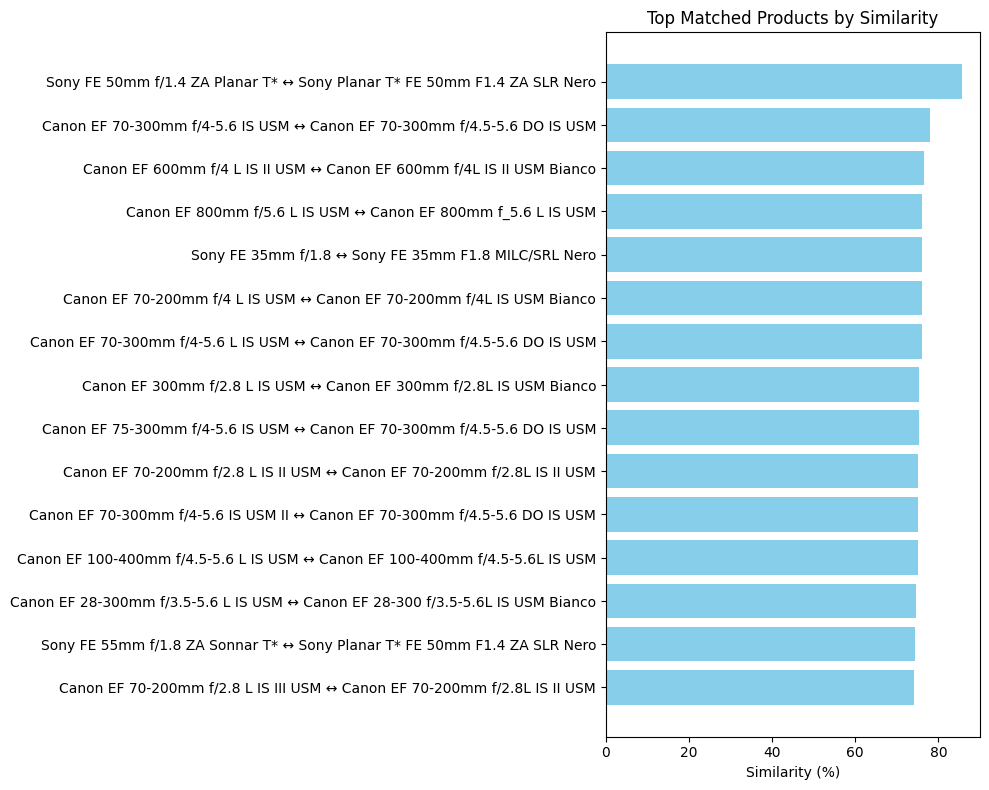

In [53]:
import matplotlib.pyplot as plt

# Filter for matches above a certain similarity threshold ( 70%)
filtered_matches = matched_df[matched_df['similarity'] >= 70]

# Sort by similarity and take top N matches (e.g., 10 or 15)
top_matches = filtered_matches.sort_values(by='similarity', ascending=False).head(15)

# Create label with both product names
labels = top_matches.apply(lambda row: f"{row['df1_name']} ↔ {row['df2_title']}", axis=1)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(labels, top_matches['similarity'], color='skyblue')
plt.xlabel('Similarity (%)')
plt.title('Top Matched Products by Similarity')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [63]:
# Calculate price difference on the full matched dataset
matched_df['price_diff'] = abs(matched_df['df1_price'] - matched_df['df2_price'])
matched_df[['df1_name', 'df2_title', 'df1_price', 'df2_price', 'price_diff']]

,df1_name,df2_title,df1_price,df2_price,price_diff
0,Canon EF 70-300mm f/4-5.6 IS USM II,Canon EF 70-300mm f/4.5-5.6 DO IS USM,2388,4311,1923
1,Canon EF 70-200mm f/2.8 L USM,Canon EF 70-200mm f/2.8L USM,489,818,329
2,Canon EF 180mm f/3.5 L Macro USM,Canon EF 180mm f/3.5L Macro USM Nero,4482,4847,365
3,Canon EF-S 15-85mm f/3.5-5.6 IS USM,Canon EF-S 15-85mm f/3.5-5.6 IS USM Nero,385,4548,4163
4,Canon EF 75-300mm f/4-5.6 IS USM,Canon EF 70-300mm f/4.5-5.6 DO IS USM,4512,4311,201
5,Canon EF 300mm f/2.8 L USM,Canon EF 300mm f/2.8L IS USM Bianco,821,431,390
6,Canon EF 70-300mm f/4-5.6 L IS USM,Canon EF 70-300mm f/4.5-5.6 DO IS USM,2275,4311,2036
7,Canon EF 70-200mm f/2.8 L IS USM,Canon EF 70-200mm f/2.8L IS USM,2514,3464,950
8,Canon EF 70-200mm f/4 L IS II USM,Canon EF 70-200mm f/4L IS USM Bianco,3633,191,3442
9,Canon EF 35mm f/2 IS USM,Canon EF 300mm f/2.8L IS USM Bianco,1254,431,823


In [54]:
top_matches['price_diff'] = abs(top_matches['df1_price'] - top_matches['df2_price'])
top_matches[['df1_name', 'df2_title', 'df1_price', 'df2_price', 'price_diff']]

,df1_name,df2_title,df1_price,df2_price,price_diff
19,Sony FE 50mm f/1.4 ZA Planar T*,Sony Planar T* FE 50mm F1.4 ZA SLR Nero,1616,2000,384
13,Canon EF 70-300mm f/4-5.6 IS USM,Canon EF 70-300mm f/4.5-5.6 DO IS USM,1582,4311,2729
44,Canon EF 600mm f/4 L IS II USM,Canon EF 600mm f/4L IS II USM Bianco,876,1017,141
15,Canon EF 800mm f/5.6 L IS USM,Canon EF 800mm f_5.6 L IS USM,1875,3942,2067
49,Sony FE 35mm f/1.8,Sony FE 35mm F1.8 MILC/SRL Nero,264,1282,1018
46,Canon EF 70-200mm f/4 L IS USM,Canon EF 70-200mm f/4L IS USM Bianco,2481,191,2290
6,Canon EF 70-300mm f/4-5.6 L IS USM,Canon EF 70-300mm f/4.5-5.6 DO IS USM,2275,4311,2036
17,Canon EF 300mm f/2.8 L IS USM,Canon EF 300mm f/2.8L IS USM Bianco,1070,431,639
4,Canon EF 75-300mm f/4-5.6 IS USM,Canon EF 70-300mm f/4.5-5.6 DO IS USM,4512,4311,201
45,Canon EF 70-200mm f/2.8 L IS II USM,Canon EF 70-200mm f/2.8L IS II USM,2712,1556,1156


## **Summary Statistics**

In [55]:
print("Total matches found:", len(matched_df))
print("High confidence matches (>85):", len(high_confidence))
print("Average similarity:", matched_df['similarity'].mean())
print("Average price difference:", top_matches['price_diff'].mean())

Total matches found: 56
High confidence matches (>85): 1
Average similarity: 72.98969953904175
Average price difference: 1258.3333333333333


In [56]:
for t in [70, 80, 85, 90]:
    count = len(matched_df[matched_df['similarity'] > t])
    print(f"Threshold > {t}: {count} matches")

Threshold > 70: 56 matches
Threshold > 80: 1 matches
Threshold > 85: 1 matches
Threshold > 90: 0 matches


In [57]:
from google.colab import files


# Export all matches with price difference
matched_df.to_csv('all_matched_price_diff.csv', index=False)
files.download('all_matched_price_diff.csv')